In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
sns.set_style('darkgrid')
import nltk
nltk.download('punkt') # Download necessary resources
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Loading the Data

In [ ]:
sms = pd.read_csv('/content/SMSSpamCollection.csv', sep='\t',
                  names=["label", "message"])
sms.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# now we will open the file for reading
with open('/content/SMSSpamCollection.csv', 'r') as file:
    # we will read the contents of the file into a string variable
    text = file.read()

In [ ]:
# now we will Tokenize the text into words
tokens = nltk.word_tokenize(text)# Tokenize the text into words

In [ ]:
# now will finally Perform POS tagging on the tokens
pos_tags = nltk.pos_tag(tokens)

print(pos_tags)

[('ham', 'NN'), ('Go', 'NNP'), ('until', 'IN'), ('jurong', 'JJ'), ('point', 'NN'), (',', ','), ('crazy', 'JJ'), ('..', 'NN'), ('Available', 'NNP'), ('only', 'RB'), ('in', 'IN'), ('bugis', 'NN'), ('n', 'RB'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN'), ('e', 'FW'), ('buffet', 'NN'), ('...', ':'), ('Cine', 'NNP'), ('there', 'EX'), ('got', 'VBD'), ('amore', 'RB'), ('wat', 'JJ'), ('...', ':'), ('ham', 'NN'), ('Ok', 'NNP'), ('lar', 'NN'), ('...', ':'), ('Joking', 'NNP'), ('wif', 'WRB'), ('u', 'JJ'), ('oni', 'NN'), ('...', ':'), ('spam', 'RB'), ('Free', 'JJ'), ('entry', 'NN'), ('in', 'IN'), ('2', 'CD'), ('a', 'DT'), ('wkly', 'JJ'), ('comp', 'NN'), ('to', 'TO'), ('win', 'VB'), ('FA', 'NNP'), ('Cup', 'NNP'), ('final', 'JJ'), ('tkts', 'NN'), ('21st', 'CD'), ('May', 'NNP'), ('2005', 'CD'), ('.', '.'), ('Text', 'VB'), ('FA', 'NNP'), ('to', 'TO'), ('87121', 'CD'), ('to', 'TO'), ('receive', 'VB'), ('entry', 'NN'), ('question', 'NN'), ('(', '('), ('std', 'JJ'), ('txt', 'NN'), ('rate', 'NN'), (')

In [ ]:

lemmas = []
for token, tag in pos_tags:
    if tag.startswith('NN'):
        lemma = lemmatizer.lemmatize(token, pos='n')
    elif tag.startswith('VB'):
        lemma = lemmatizer.lemmatize(token, pos='v')
    elif tag.startswith('JJ'):
        lemma = lemmatizer.lemmatize(token, pos='a')
    else:
        lemma = token
    lemmas.append(lemma)

In [ ]:
lemmatized_text = ' '.join(lemmas)
print(lemmatized_text)

ham Go until jurong point , crazy .. Available only in bugis n great world la e buffet ... Cine there get amore wat ... ham Ok lar ... Joking wif u oni ... spam Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 . Text FA to 87121 to receive entry question ( std txt rate ) T & C 's apply 08452810075over18's ham U dun say so early hor ... U c already then say ... ham Nah I do n't think he go to usf , he live around here though spam FreeMsg Hey there darling it 's be 3 week 's now and no word back ! I 'd like some fun you up for it still ? Tb ok ! XxX std chgs to send , £1.50 to rcv ham Even my brother be not like to speak with me . They treat me like aid patent . ham As per your request 'Melle Melle ( Oru Minnaminunginte Nurungu Vettam ) ' have be set as your callertune for all Callers . Press * 9 to copy your friend Callertune spam WINNER ! ! As a value network customer you have be select to receivea £900 prize reward ! To claim call 09061701461 . Claim code KL341 . Val

Performing Exploratory Data Analysis

In [ ]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Intotal there are 5572 messages.

In [ ]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Target variable is either ham or spam and there exists 4825 ham messages and 747 spam messages.

Text(0.5, 1.0, 'Count Plot')

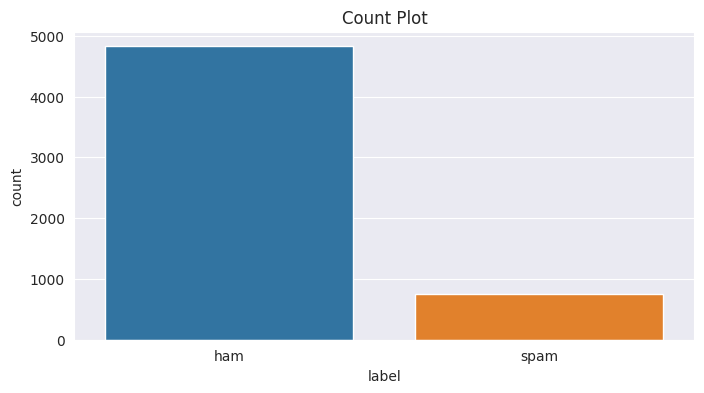

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=sms)

plt.title('Count Plot')


Text(0.5, 1.0, 'Count Plot')

Now we will focus on length of the messages

In [ ]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<ipython-input-15-4619609e7abc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sms[('length')])


<Axes: xlabel='length', ylabel='Density'>

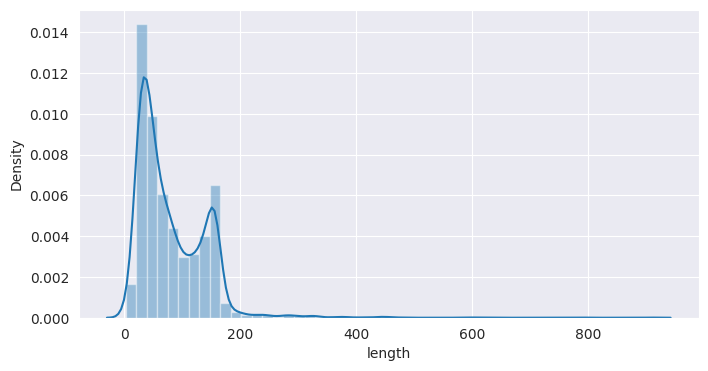

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(sms[('length')])

Data has some outliers with more than 800 characters. box plot is used to discover the outliers.

<Axes: >

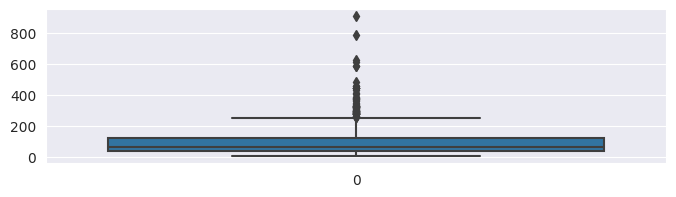

In [ ]:
plt.figure(figsize=(8,2))
sns.boxplot(sms[('length')])

There are 3 messages with about 600 characters, 1 with 800 characters and 1 with 900 characters. 

In [ ]:
sms[sms['length'] > 500] 

,label,message,length
1085,ham,For me the love should start with attraction.i...,910
1579,ham,How to Make a girl Happy? It's not at all diff...,611
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
2434,ham,Indians r poor but India is not a poor country...,629
2849,ham,Sad story of a Man - Last week was my b'day. M...,588


In [ ]:
for text in sms[sms['length'] > 550]['message']:
    print(text, "\n\n")      

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.. 


How to Make a girl Happy? It's not at all difficult to make girls happy. U only need t

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


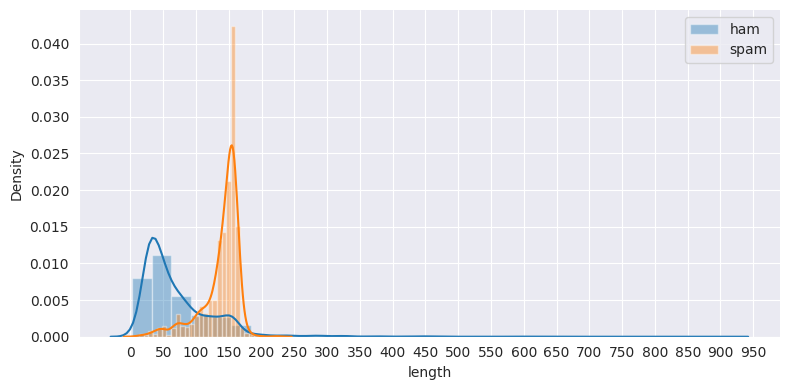

In [ ]:
g = sns.FacetGrid(data=sms, hue="label", height=4, aspect=2)
g.map(sns.distplot, 'length', bins=30)
g.set(xticks=np.arange(0,1000,50))
plt.legend()

Average length of harm messages is about 40 characters while that of spam messages is 160. there is big difference, so length is a good feature to classify message labels.

 - Creating Model
Text Pre-processing

Before vectorizing the messages, we will clean them to get the words we actually want by removing punctuation and stop words (i.e. "the", "a", "to"...). This process is called tokenization we will need the NLTK library to do this step.

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
def text_preprocess(text):
    remove_punctuation = "".join([c for c in text if c not in string.punctuation])
    remove_stopwords = [word for word in remove_punctuation.split() if word not in stopwords.words('english')]
    
    return remove_stopwords


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
sms['message'].head(10)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: message, dtype: object

In [ ]:
sms['message'].head(10).apply(text_preprocess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, They, treat, like...
7    [As, per, request, Melle, Melle, Oru, Minnamin...
8    [WINNER, As, valued, network, customer, select...
9    [Had, mobile, 11, months, U, R, entitled, Upda...
Name: message, dtype: object



```
`# This is formatted as code`
```

Create **Model**

In this step we will create a pipeline, in which:

first, we use CountVectorizer to convert text messages into a matrix of token counts, where one dimension is all the words in the data, and the other is all the messages,
then, we calculate term frequency-inverse document frequency (TF-IDF), which measures the importance of each word to each message in the whole data,
finally, we use Naive Bayes classifier model to train and predict the data.
But first we need to split the data into train and test data.

In [ ]:
#Train the test split
from sklearn.model_selection import train_test_split

X = sms['message']
y= sms['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:

#Create the pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('vectorize', CountVectorizer(analyzer=text_preprocess)),
    ('tfidf', TfidfTransformer()),
    ('NBclassifier', MultinomialNB())
])

In [ ]:
#Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorize',
                 CountVectorizer(analyzer=<function text_preprocess at 0x7fb83bbf0f70>)),
                ('tfidf', TfidfTransformer()),
                ('NBclassifier', MultinomialNB())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
#Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

print(f"""
Confusion Matrix:
{confusion_matrix(y_test, y_pred)}

Classification Report:
{classification_report(y_test, y_pred)}
""")


Confusion Matrix:
[[1593    0]
 [  66  180]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.73      0.85       246

    accuracy                           0.96      1839
   macro avg       0.98      0.87      0.91      1839
weighted avg       0.97      0.96      0.96      1839




There are intotal 66 messages that the model fails to predict as spam in the total of 246 spam messages in the dataset but the model does not misclassify any normal messages as spam. The overall accuracy rate is 96%.